<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/KT_giuaki/VN_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
from numpy.lib.npyio import load
import numpy as np

In [ ]:
#Load data từ drive lên 
folder='/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien_banknotes/'
#Tạo 2 danh sách trống để chứa ảnh và nhãn cần xử lí 
photos,labels = list(),list()
for file in listdir(folder):
  if file.startswith('tien_5'):
    output =  0.0  #'5.000 Ngàn đồng'    
  if file.startswith('tien_10'):
    output =  1.0    #'10.000 Ngàn đồng'
  if file.startswith('tien_20'):
    output =  2.0    #'20.000 Ngàn đồng' 
  if file.startswith('tien_50'):
    output =  3.0   #'50.000 Ngàn đồng'  
  if file.startswith('tien_100'):
    output =  4.0   #'100.000 Ngàn đồng'  
  if file.startswith('200'):
    output =  5.0  #'200.000 Ngàn đồng'  
  if file.startswith('tien_500'):
    output =  6.0   #'500.000 Ngàn đồng' 
  photo = load_img(folder+file, target_size= (50,100))
  photo = img_to_array(photo) #Chuyển ảnh sang kiểu mảng để có thể xử lí dễ dàng 
  photos.append(photo)
  labels.append(output)
photos= asarray(photos)
labels = asarray(labels)
# Lưu file hình và file nhãn vào drive để sau này xử lí  
save('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien_photo.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien_label.npy',labels)

In [ ]:
#Tải ảnh và nhãn đã lưu lên để xử lí
photo = np.load('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien_photo.npy')
label = np.load('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien_label.npy')

In [ ]:
#Chia dữ liệu thành 2 phần train và test để kiểm tra mô hình 
split_sample = int(0.2*len(photo)) # phần train : 80% , test: 20%
(x_train,y_train) = photo[split_sample:],label[split_sample:]
(x_test,y_test)= photo[:split_sample],label[:split_sample]

In [ ]:
#Kiểm tra kích thước của tập train
x_train.shape

(396, 50, 100, 3)

In [ ]:
#Kiểm tra kích thước của tập test
x_test.shape

(98, 50, 100, 3)

In [ ]:
#Đưa ảnh về độ phân giải 50x100 để đảm bảo độ chính xác 
# và giảm thiểu thời gian tính toán
x_train = x_train.reshape(396,50,100,3)
x_test = x_test.reshape(98,50,100,3)
#Chia 255 để chuẩn hóa dữ liệu về khoảng 0 đến 1 giúp 
# mô hình học được nhanh và hiệu quả hơn 
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255

In [ ]:
# chuyển đổi các nhãn lớp của dữ liệu huấn luyện và 
# kiểm tra thành các vectơ one-hot encoding. 
from keras.utils import to_categorical
y_train = to_categorical(y_train,7)
y_test  = to_categorical(y_test,7)

In [ ]:
# Khai báo các thư viện cần thiết để xây dựng mô hình CNN
from keras.models import Sequential , Model
from keras.layers import Dense , Flatten, Dropout, Conv2D, MaxPooling2D ,Normalization,Input
from keras.optimizers import Adam 

In [ ]:
# Định nghĩa các biến 
batch_size = 32  # số lượng học
epochs =  20     #số lần học
classes = 7      # Số lớp 

In [ ]:
model=Sequential() # Khởi tạo đối tượng để xây dựng mô hình CNN 

# Dùng mô hình CNN với 3 lớp tích chập để huấn luyện cho tập dữ liệu tiền giấy 
model.add(Conv2D(32,kernel_size=(3,3),activation ='linear',input_shape= (50,100,3),padding= 'same'))   
# 32:số lần tích chập, (3,3): kích thước bộ lọc , hàm kích hoạt là hàm tuyến tính 
# với đầu vào ảnh là 50x100 pixel và 3 kênh màu

from keras.layers import LeakyReLU
 # Sử dụng hàm kích hoạt LeakyReLU cho đầu ra của lớp Conv2D.
model.add(LeakyReLU(alpha= 0.1))
#Lọc giá trị lớn hơn với kích thước 2x2 
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128,(3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

In [ ]:
from keras.backend import categorical_crossentropy
from keras.losses import categorical_crossentropy
model.add(Flatten())  #chuyển đổi đầu ra của các lớp tích chập 
                      #và lớp pooling thành một vector 1D 
model.add(Dense(128,activation='linear'))   #Đi qua 128 lớp
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 100, 32)       896       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 50, 100, 32)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 50, 64)        18496     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 25, 50, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 25, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss= categorical_crossentropy,optimizer= Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,verbose =1)      
# verbose=1,Hiển thị giá trị train, chỉ xuất hiện 1 lần rồi biến mất

Epoch 1/20
13/13 [==============================] - 10s 25ms/step - loss: 1.7397 - accuracy: 0.3283
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 1.1577 - accuracy: 0.5455
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.9176 - accuracy: 0.6162
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6295 - accuracy: 0.7626
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5242 - accuracy: 0.8081
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.8990
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.3276 - accuracy: 0.8864
Epoch 8/20
13/13 [==============================] - 0s 8ms/step - loss: 0.2882 - accuracy: 0.8990
Epoch 9/20
13/13 [==============================] - 0s 8ms/step - loss: 0.1932 - accuracy: 0.9343
Epoch 10/20
13/13 [==============================] - 0s 9ms/step - loss: 0.1746 - accuracy: 0.9318
Epoch 11/20
13/1

In [ ]:
#Lưu mô hình vừa được huấn luyện xuống drive 
model.save('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Tien.h5')

Test loss: 1.265075155743034e-07
Test accuracy; 1.0


Text(0.5, 1.0, 'Test loss & Test Accuracy')

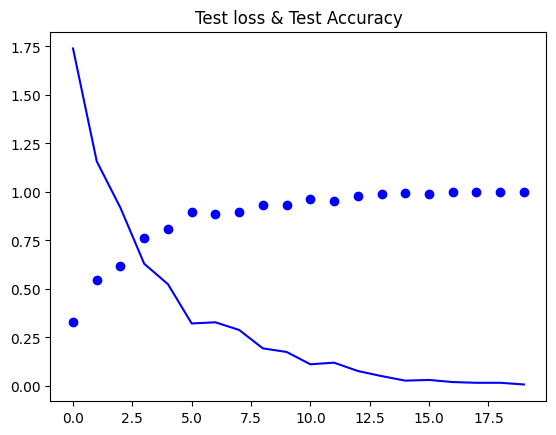

In [ ]:
# Vẽ đồ thị độ chính xác và  của tập test
import matplotlib.pyplot as plt
eval = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', eval[0])
print('Test accuracy;',eval[1])
accuracy = train.history['accuracy']
val_accuracy = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Test loss')
plt.plot(epochs,val_accuracy,'b',label= 'Test Accuracy')
plt.title('Test loss & Test Accuracy')

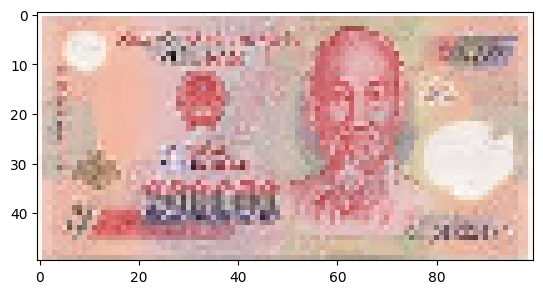

1/1 [==============================] - 0s 20ms/step
[5]
Hình ảnh có mệnh giá: 200.000 đồng


In [ ]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
# Tải một ảnh chưa train qua để kiểm tra độ chính xác của mô hình 
img = load_img('/content/drive/MyDrive/Colab Notebooks/Tien_giay/Test_image/200k.jpg',target_size=(50,100))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,50,100,3)
img = img.astype('float32')
img = img /255
Gia_tien=np.argmax(model.predict(img),axis=-1)
print(Gia_tien)
if (Gia_tien == 0) :
  print('Hình ảnh có mệnh giá: 5.000 đồng')
if (Gia_tien == 1) :
  print('Hình ảnh có mệnh giá: 10.000 đồng')
if (Gia_tien == 2) :
  print('Hình ảnh có mệnh giá: 20.000 đồng')
if (Gia_tien == 3) :
  print('Hình ảnh có mệnh giá: 50.000 đồng')
if (Gia_tien == 4) :
  print('Hình ảnh có mệnh giá: 100.000 đồng')
if (Gia_tien == 5) :
  print('Hình ảnh có mệnh giá: 200.000 đồng')
if (Gia_tien == 6) :
  print('Hình ảnh có mệnh giá: 500.000 đồng')
